# Data Science Task 3

## Data Cleaning and Joining

In [90]:
#Importation of libraries that are needed for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [91]:
pizzas = pd.read_csv(r"C:\Users\Toshiba\Desktop\Data Analysis Materials\Data Science\Datasets\pizza_sales\pizzas.csv")

In [92]:
pizza_types = pd.read_csv(r"C:\Users\Toshiba\Desktop\Data Analysis Materials\Data Science\Datasets\pizza_sales\pizza_types.csv",encoding="latin1")

In [93]:
orders = pd.read_csv(r"C:\Users\Toshiba\Desktop\Data Analysis Materials\Data Science\Datasets\pizza_sales\orders.csv")

In [94]:
orders_details = pd.read_csv(r"C:\Users\Toshiba\Desktop\Data Analysis Materials\Data Science\Datasets\pizza_sales\order_details.csv")

In [95]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [96]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [97]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [98]:
orders_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [99]:
Orders = pd.merge(orders, orders_details, on = "order_id", how = "right")

In [100]:
Orders.shape

(48620, 6)

In [101]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          48620 non-null  int64 
 1   date              48620 non-null  object
 2   time              48620 non-null  object
 3   order_details_id  48620 non-null  int64 
 4   pizza_id          48620 non-null  object
 5   quantity          48620 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.2+ MB


In [102]:
Orders.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
dtype: int64

In [103]:
Orders.duplicated().sum()

0

In [104]:
Orders["order_id"].value_counts() 

order_id
18845    21
10760    21
18280    15
21158    15
17464    15
         ..
10351     1
10355     1
10357     1
10360     1
21350     1
Name: count, Length: 21350, dtype: int64

In [105]:
Orders["date"].value_counts() 

date
2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: count, Length: 358, dtype: int64

In [106]:
Orders["time"].value_counts() 

time
12:32:00    26
11:59:10    24
12:53:29    23
12:52:36    23
12:26:04    23
            ..
12:32:48     1
22:04:30     1
20:35:35     1
12:43:50     1
22:09:54     1
Name: count, Length: 16382, dtype: int64

In [107]:
Orders["order_details_id"].value_counts() 

order_details_id
1        1
32418    1
32409    1
32410    1
32411    1
        ..
16209    1
16210    1
16211    1
16212    1
48620    1
Name: count, Length: 48620, dtype: int64

In [108]:
Orders["pizza_id"].value_counts() 

pizza_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

In [109]:
Orders["quantity"].value_counts()  

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64

In [110]:
pizzas.shape

(96, 4)

In [111]:
pizza_types.shape

(32, 4)

In [112]:
pizza_type = pd.merge(pizzas,pizza_types, on="pizza_type_id", how="left")

pizza_type.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [113]:
Pizza_Orders = pd.merge(pizza_type,Orders, on="pizza_id", how="left")

Pizza_Orders.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0


In [114]:
Pizza_Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48625 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pizza_id          48625 non-null  object 
 1   pizza_type_id     48625 non-null  object 
 2   size              48625 non-null  object 
 3   price             48625 non-null  float64
 4   name              48625 non-null  object 
 5   category          48625 non-null  object 
 6   ingredients       48625 non-null  object 
 7   order_id          48620 non-null  float64
 8   date              48620 non-null  object 
 9   time              48620 non-null  object 
 10  order_details_id  48620 non-null  float64
 11  quantity          48620 non-null  float64
dtypes: float64(4), object(8)
memory usage: 4.5+ MB


In [115]:
Pizza_Orders.isna().sum()

pizza_id            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
order_id            5
date                5
time                5
order_details_id    5
quantity            5
dtype: int64

In [116]:
Pizza_Orders["order_id"].value_counts()

order_id
10760.0    21
18845.0    21
20710.0    15
20163.0    15
14304.0    15
           ..
631.0       1
606.0       1
525.0       1
14533.0     1
21151.0     1
Name: count, Length: 21350, dtype: int64

In [117]:
Pizza_Orders["time"].value_counts()

time
12:32:00    26
11:59:10    24
12:52:36    23
12:26:04    23
12:53:29    23
            ..
22:28:22     1
14:51:40     1
21:10:07     1
12:21:29     1
13:30:48     1
Name: count, Length: 16382, dtype: int64

In [118]:
Pizza_Orders["date"].value_counts()

date
2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: count, Length: 358, dtype: int64

In [119]:
Pizza_Orders["order_details_id"].value_counts()

order_details_id
11.0       1
16312.0    1
15374.0    1
15445.0    1
15513.0    1
          ..
17526.0    1
17590.0    1
17614.0    1
17812.0    1
48588.0    1
Name: count, Length: 48620, dtype: int64

In [120]:
Pizza_Orders["quantity"].value_counts()

quantity
1.0    47693
2.0      903
3.0       21
4.0        3
Name: count, dtype: int64

In [121]:
Pizza_Orders["pizza_id"].value_counts()

pizza_id
big_meat_s       1811
thai_ckn_l       1365
five_cheese_l    1359
four_cheese_l    1273
classic_dlx_m    1159
                 ... 
big_meat_m          1
big_meat_l          1
five_cheese_s       1
five_cheese_m       1
four_cheese_s       1
Name: count, Length: 96, dtype: int64

In [122]:
Pizza_Orders["pizza_type_id"].value_counts()

pizza_type_id
classic_dlx     2416
bbq_ckn         2372
hawaiian        2370
pepperoni       2369
thai_ckn        2315
cali_ckn        2302
spicy_ital      1887
sicilian        1887
southw_ckn      1885
four_cheese     1851
ital_supr       1849
big_meat        1813
veggie_veg      1510
mexicana        1456
napolitana      1451
spinach_fet     1432
prsc_argla      1428
peppr_salami    1422
ital_cpcllo     1414
the_greek       1406
five_cheese     1361
pep_msh_pep     1342
green_garden     987
ckn_alfredo      980
ital_veggie      975
ckn_pesto        961
soppressata      957
spin_pesto       957
spinach_supr     940
calabrese        927
mediterraneo     923
brie_carre       480
Name: count, dtype: int64

In [123]:
Pizza_Orders["size"].value_counts()

size
L      18527
M      15387
S      14139
XL       544
XXL       28
Name: count, dtype: int64

In [124]:
Pizza_Orders["name"].value_counts()

name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1851
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1813
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza           

In [125]:
Pizza_Orders["category"].value_counts()

category
Classic    14581
Supreme    11777
Veggie     11452
Chicken    10815
Name: count, dtype: int64

In [126]:
Pizza_Orders["ingredients"].value_counts()

ingredients
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola Piccant

In [127]:
Pizza_Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48625 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pizza_id          48625 non-null  object 
 1   pizza_type_id     48625 non-null  object 
 2   size              48625 non-null  object 
 3   price             48625 non-null  float64
 4   name              48625 non-null  object 
 5   category          48625 non-null  object 
 6   ingredients       48625 non-null  object 
 7   order_id          48620 non-null  float64
 8   date              48620 non-null  object 
 9   time              48620 non-null  object 
 10  order_details_id  48620 non-null  float64
 11  quantity          48620 non-null  float64
dtypes: float64(4), object(8)
memory usage: 4.5+ MB


In [128]:
Pizza_Orders.head(5)

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0


In [129]:
Pizza_Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48625 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pizza_id          48625 non-null  object 
 1   pizza_type_id     48625 non-null  object 
 2   size              48625 non-null  object 
 3   price             48625 non-null  float64
 4   name              48625 non-null  object 
 5   category          48625 non-null  object 
 6   ingredients       48625 non-null  object 
 7   order_id          48620 non-null  float64
 8   date              48620 non-null  object 
 9   time              48620 non-null  object 
 10  order_details_id  48620 non-null  float64
 11  quantity          48620 non-null  float64
dtypes: float64(4), object(8)
memory usage: 4.5+ MB


In [130]:
Pizza_Orders["order_id"].value_counts()

order_id
10760.0    21
18845.0    21
20710.0    15
20163.0    15
14304.0    15
           ..
631.0       1
606.0       1
525.0       1
14533.0     1
21151.0     1
Name: count, Length: 21350, dtype: int64

In [131]:
Pizza_Orders["order_id"] = Pizza_Orders["order_id"].fillna("Unknown")

In [132]:
Pizza_Orders.isna().sum()

pizza_id            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
order_id            0
date                5
time                5
order_details_id    5
quantity            5
dtype: int64

In [133]:
Pizza_Orders.dropna(subset = ["date"], inplace = True)

In [134]:
Pizza_Orders["time"] = Pizza_Orders["time"].fillna(pd.NA)

In [135]:
Pizza_Orders.isna().sum()

pizza_id            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
order_id            0
date                0
time                0
order_details_id    0
quantity            0
dtype: int64

In [136]:
Pizza_Orders["date"] = pd.to_datetime(Pizza_Orders["date"])

In [137]:
Pizza_Orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48620 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pizza_id          48620 non-null  object        
 1   pizza_type_id     48620 non-null  object        
 2   size              48620 non-null  object        
 3   price             48620 non-null  float64       
 4   name              48620 non-null  object        
 5   category          48620 non-null  object        
 6   ingredients       48620 non-null  object        
 7   order_id          48620 non-null  object        
 8   date              48620 non-null  datetime64[ns]
 9   time              48620 non-null  object        
 10  order_details_id  48620 non-null  float64       
 11  quantity          48620 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 4.8+ MB


In [138]:
#Addition of month column to the dataset
Pizza_Orders["month"] = Pizza_Orders["date"].dt.month_name()

In [139]:
#Addiyion of day column to the dataset
Pizza_Orders["day"] = Pizza_Orders["date"].dt.day_name()

In [140]:
Pizza_Orders.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity,month,day
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0,January,Thursday
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0,January,Friday
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0,January,Friday
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0,January,Saturday
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0,January,Sunday


In [141]:
Pizza_Orders.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity,month,day
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0,January,Thursday
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0,January,Friday
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0,January,Friday
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0,January,Saturday
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0,January,Sunday


In [142]:
Pizza_Orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48620 entries, 0 to 48624
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pizza_id          48620 non-null  object        
 1   pizza_type_id     48620 non-null  object        
 2   size              48620 non-null  object        
 3   price             48620 non-null  float64       
 4   name              48620 non-null  object        
 5   category          48620 non-null  object        
 6   ingredients       48620 non-null  object        
 7   order_id          48620 non-null  object        
 8   date              48620 non-null  datetime64[ns]
 9   time              48620 non-null  object        
 10  order_details_id  48620 non-null  float64       
 11  quantity          48620 non-null  float64       
 12  month             48620 non-null  object        
 13  day               48620 non-null  object        
dtypes: datetime64[ns](1), float

In [143]:
Pizza_Orders["total_sales"] = Pizza_Orders["price"] * Pizza_Orders["quantity"]

In [144]:
Pizza_Orders.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity,month,day,total_sales
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0,January,Thursday,12.75
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0,January,Friday,12.75
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0,January,Friday,12.75
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0,January,Saturday,12.75
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0,January,Sunday,12.75


In [145]:
Pizza_Orders.to_csv("cleaned_pizza_sales.data.csv", index = False)

In [146]:
Pizza_Orders.copy().head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity,month,day,total_sales
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0,January,Thursday,12.75
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0,January,Friday,12.75
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0,January,Friday,12.75
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0,January,Saturday,12.75
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0,January,Sunday,12.75


## Data Analysis

In [147]:
pizza_sales = pd.read_csv(r"C:\Users\Toshiba\Desktop\Data Analysis Materials\Data Science\Datasets\cleaned_pizza_sales.data.csv")

In [148]:
pizza_sales.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity,month,day,total_sales
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0,January,Thursday,12.75
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0,January,Friday,12.75
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0,January,Friday,12.75
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0,January,Saturday,12.75
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0,January,Sunday,12.75


In [149]:
pizza_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pizza_id          48620 non-null  object 
 1   pizza_type_id     48620 non-null  object 
 2   size              48620 non-null  object 
 3   price             48620 non-null  float64
 4   name              48620 non-null  object 
 5   category          48620 non-null  object 
 6   ingredients       48620 non-null  object 
 7   order_id          48620 non-null  float64
 8   date              48620 non-null  object 
 9   time              48620 non-null  object 
 10  order_details_id  48620 non-null  float64
 11  quantity          48620 non-null  float64
 12  month             48620 non-null  object 
 13  day               48620 non-null  object 
 14  total_sales       48620 non-null  float64
dtypes: float64(5), object(10)
memory usage: 5.6+ MB


In [150]:
#Addition of hour column to the dataset
pizza_sales["hour"] = pd.to_datetime(pizza_sales["time"], errors = "coerce").dt.hour

pizza_sales.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity,month,day,total_sales,hour
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0,January,Thursday,12.75,12
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0,January,Friday,12.75,17
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0,January,Friday,12.75,20
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0,January,Saturday,12.75,21
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0,January,Sunday,12.75,12


In [151]:
pizza_sales["name"].value_counts()

name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza           

### 1.Total revenue/sales

In [152]:
Total_sales = pizza_sales["total_sales"].sum()

print(f"Total revenue made from pizza sales is = ${Total_sales}")

Total revenue made from pizza sales is = $817860.05


### 2.Total Quantity Sold

In [153]:
total_quantity_sold = pizza_sales["quantity"].sum()

print(f"Total quantity of pizza sold is = {total_quantity_sold}")

Total quantity of pizza sold is = 49574.0


### 3.Total Orders

In [154]:
total_orders = len(np.unique(pizza_sales["order_id"]))

print(f"Total orders made for pizza = {total_orders}")

Total orders made for pizza = 21350


### 4.Pizza Types

In [155]:
pizza_types = len(np.unique(pizza_sales["pizza_type_id"]))


print(f"Total number of pizza types = {pizza_types}")

Total number of pizza types = 32


### 5.Average Price of Pizzas

In [156]:
Avg_pizza_prices = pizza_sales.groupby("name")["price"].mean().reset_index()

Avg_pizza_prices.head()

,name,price
0,The Barbecue Chicken Pizza,17.572934
1,The Big Meat Pizza,12.000000
2,The Brie Carre Pizza,23.650000
3,The Calabrese Pizza,17.005124
4,The California Chicken Pizza,17.448523


In [157]:
#The average price of pizzas(un ordered)
Avg_pizza_prices.rename(columns = {"price":"Avg_price"}, inplace = True)

Avg_pizza_prices.head()

,name,Avg_price
0,The Barbecue Chicken Pizza,17.572934
1,The Big Meat Pizza,12.000000
2,The Brie Carre Pizza,23.650000
3,The Calabrese Pizza,17.005124
4,The California Chicken Pizza,17.448523


In [158]:
#Average price of pizzas arranged in descening order
Avg_pizza_prices.sort_values(by = "Avg_price", ascending = False, inplace = True)

Avg_pizza_prices.head()

,name,Avg_price
2,The Brie Carre Pizza,23.650000
10,The Greek Pizza,20.035633
8,The Five Cheese Pizza,18.500000
30,The Thai Chicken Pizza,18.286069
26,The Spicy Italian Pizza,18.104663


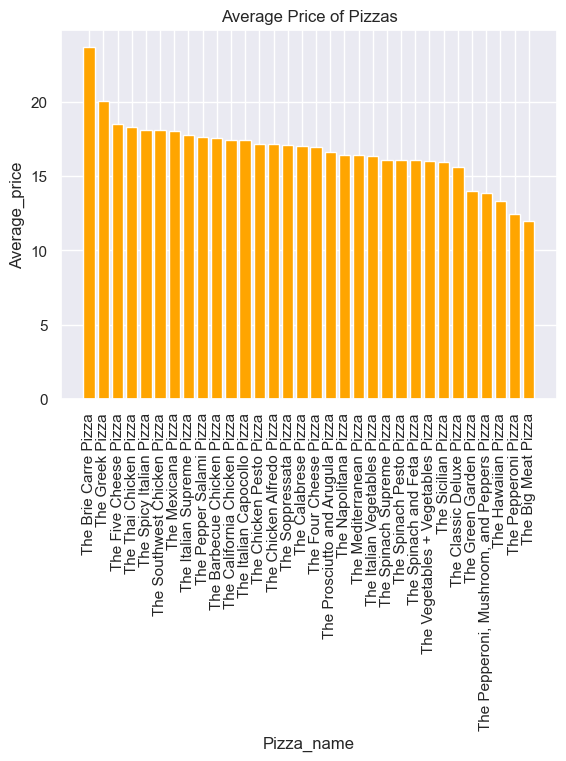

In [159]:
#A bar chart showing the average price of all types of pizzas
plt.bar(Avg_pizza_prices["name"], Avg_pizza_prices["Avg_price"], color = 'orange')
plt.xticks(rotation = 90)
plt.title("Average Price of Pizzas")
plt.xlabel("Pizza_name")
plt.ylabel("Average_price")

plt.show()
           

### 6.Peak Hours of Sales

In [160]:
#Hours in which the highest sales are made(un ordered)
peak_hours_of_sales = pizza_sales.groupby("hour")["total_sales"].agg([np.sum,np.mean]).reset_index()

peak_hours_of_sales.head()

,hour,sum,mean
0,9,83.00,20.750000
1,10,303.65,17.861765
2,11,44935.80,16.817290
3,12,111877.90,17.098869
4,13,106065.70,17.099097


In [161]:
peak_hours_of_sales.rename(columns = {"sum":"peak_hour_total_sales", "mean":"peak_hour_avg_sales"}, inplace = True)

peak_hours_of_sales.head()

,hour,peak_hour_total_sales,peak_hour_avg_sales
0,9,83.00,20.750000
1,10,303.65,17.861765
2,11,44935.80,16.817290
3,12,111877.90,17.098869
4,13,106065.70,17.099097


In [162]:
#Descending order of hours in which the higest sales are made
peak_hours_of_sales.sort_values(by = "peak_hour_avg_sales", ascending = False, inplace = True)

peak_hours_of_sales.head()

,hour,peak_hour_total_sales,peak_hour_avg_sales
0,9,83.00,20.750000
1,10,303.65,17.861765
4,13,106065.70,17.099097
3,12,111877.90,17.098869
2,11,44935.80,16.817290


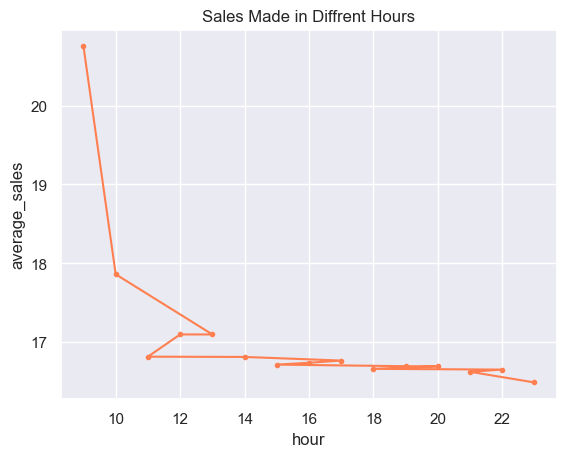

In [163]:
#A line chart demostrating the verage sales made in different hours
plt.plot(peak_hours_of_sales["hour"], peak_hours_of_sales["peak_hour_avg_sales"], color = "coral", marker = ".")
plt.title("Sales Made in Diffrent Hours")
plt.xlabel("hour")
plt.ylabel("average_sales")

plt.show()

### 7.Total Sales Made on Each Day

In [164]:
#Total sales made each day
total_sales_per_day = pizza_sales.groupby("day")["total_sales"].agg([np.sum,np.mean]).reset_index()

total_sales_per_day

,day,sum,mean
0,Friday,136073.90,16.786812
1,Monday,107329.55,16.851868
2,Saturday,123182.40,16.748117
3,Sunday,99203.50,16.765844
4,Thursday,123528.50,16.868565
5,Tuesday,114133.80,16.901199
6,Wednesday,114408.40,16.832191


In [165]:
total_sales_per_day.rename(columns = {"sum":"total_sales", "mean":"avg_sales"}, inplace = True)

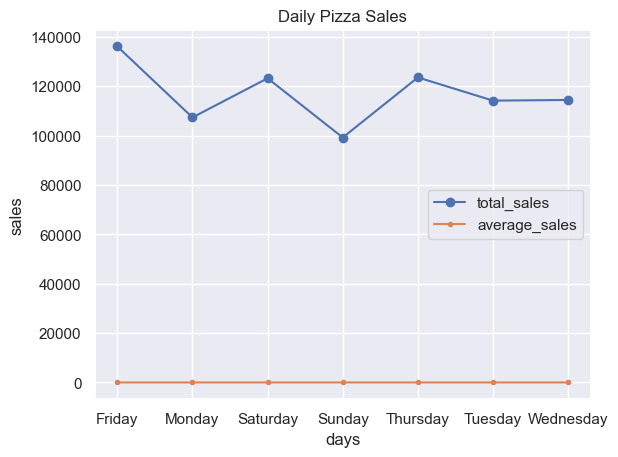

In [166]:
#A line graph illustrating the total and average pizza daily sales 
plt.plot(total_sales_per_day["day"], total_sales_per_day["total_sales"], label = "total_sales", marker = "o")
plt.plot(total_sales_per_day["day"], total_sales_per_day["avg_sales"], label = "average_sales", marker = ".")
plt.title("Daily Pizza Sales")
plt.xlabel("days")
plt.ylabel("sales")
plt.legend()

plt.show()

In [167]:
#Days in which the highest sales are recorded(arranged in descending order)
day_with_highest_sales = total_sales_per_day.sort_values(by = "total_sales", ascending = False)

day_with_highest_sales

,day,total_sales,avg_sales
0,Friday,136073.90,16.786812
4,Thursday,123528.50,16.868565
2,Saturday,123182.40,16.748117
6,Wednesday,114408.40,16.832191
5,Tuesday,114133.80,16.901199
1,Monday,107329.55,16.851868
3,Sunday,99203.50,16.765844


### 8.Top Five Best Selling Pizzas

In [168]:
#Top five pizzas with the highest sales
Total_sales = pizza_sales.groupby("name")["total_sales"].agg([np.sum,np.mean]).reset_index()

Total_sales.head()

,name,sum,mean
0,The Barbecue Chicken Pizza,42768.00,18.030354
1,The Big Meat Pizza,22968.00,12.682496
2,The Brie Carre Pizza,11588.50,24.142708
3,The Calabrese Pizza,15934.25,17.189051
4,The California Chicken Pizza,41409.50,17.988488


In [169]:
Best_selling_pizzas = Total_sales.sort_values(by = "sum", ascending = False)

Best_selling_pizzas[:5]

,name,sum,mean
30,The Thai Chicken Pizza,43434.25,18.762095
0,The Barbecue Chicken Pizza,42768.00,18.030354
4,The California Chicken Pizza,41409.50,17.988488
7,The Classic Deluxe Pizza,38180.50,15.803187
26,The Spicy Italian Pizza,34831.25,18.458532


In [170]:
Best_pizzas = Best_selling_pizzas[:5]

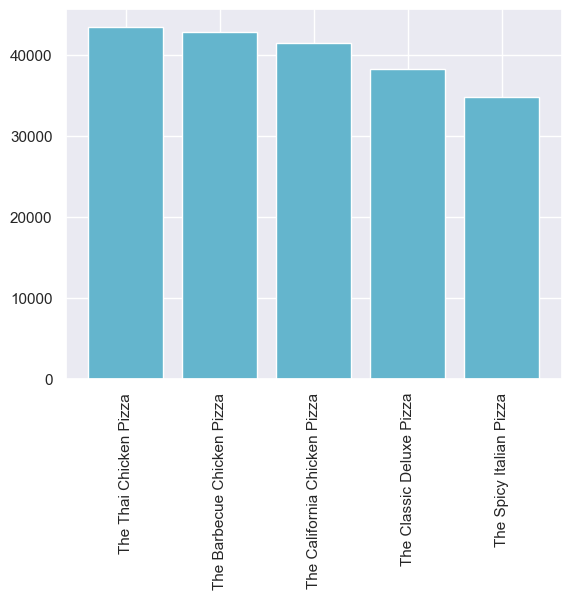

In [171]:
#Bar chart showing the top five selling pizzas
plt.bar(Best_pizzas["name"], Best_pizzas["sum"], color = "c")
plt.xticks(rotation = 90)

plt.show()

### 9.Monthly Sales

In [172]:
#Total/Average sales made each month
monthly_sales = pizza_sales.groupby("month")["total_sales"].agg([np.sum,np.mean]).reset_index()

monthly_sales.head()

,month,sum,mean
0,April,68736.80,16.901106
1,August,68278.25,16.677638
2,December,64701.15,16.766300
3,February,65159.60,16.741932
4,January,69793.30,16.793383


In [173]:
monthly_sales.sort_values(by = "month", inplace = True)

monthly_sales.head()

,month,sum,mean
0,April,68736.80,16.901106
1,August,68278.25,16.677638
2,December,64701.15,16.766300
3,February,65159.60,16.741932
4,January,69793.30,16.793383


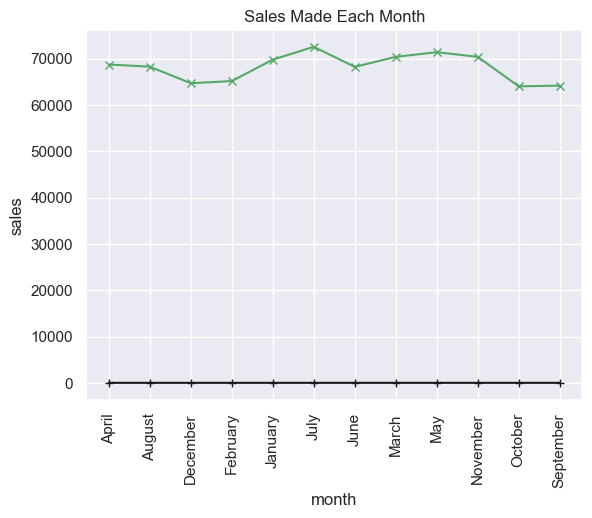

In [174]:
#A line chart demostrating the total and average monthly sales
plt.plot(monthly_sales["month"], monthly_sales["sum"], color = "g", marker = "x")
plt.plot(monthly_sales["month"], monthly_sales["mean"], color = "k", marker = "+")
plt.xticks(rotation = 90)
plt.title("Sales Made Each Month")
plt.xlabel("month")
plt.ylabel("sales")

plt.show()

### 10.Pizza Types That are not Doing Well

In [175]:
poor_performing_pizza_types = pizza_sales.groupby("pizza_type_id")["total_sales"].agg([np.sum,np.mean]).reset_index()

poor_performing_pizza_types.head()

,pizza_type_id,sum,mean
0,bbq_ckn,42768.00,18.030354
1,big_meat,22968.00,12.682496
2,brie_carre,11588.50,24.142708
3,calabrese,15934.25,17.189051
4,cali_ckn,41409.50,17.988488


In [176]:
#Sales of pizza types arranged in ascending order
poor_performing_pizza_types.sort_values(by = "sum", inplace = True)

poor_performing_pizza_types.head()

,pizza_type_id,sum,mean
2,brie_carre,11588.50,24.142708
10,green_garden,13955.75,14.139564
28,spinach_supr,15277.75,16.252926
15,mediterraneo,15360.50,16.641928
26,spin_pesto,15596.00,16.296761


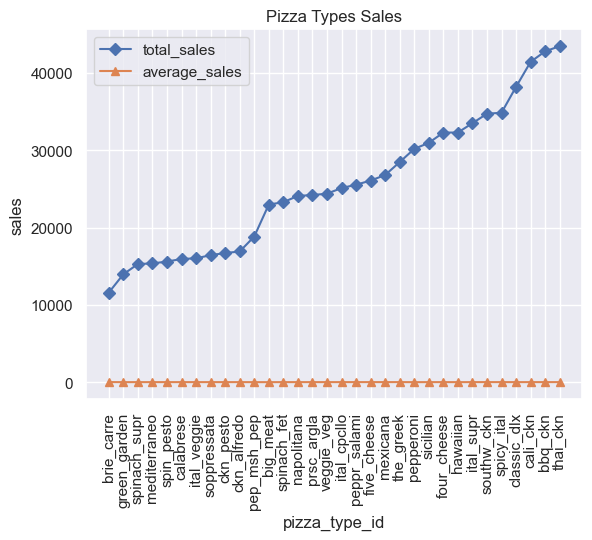

In [177]:
#A line chart showing total and average sales of pizza types that have lower sales(arrnged in ascending order)
plt.plot(poor_performing_pizza_types["pizza_type_id"], poor_performing_pizza_types["sum"], label = "total_sales", marker = "D")
plt.plot(poor_performing_pizza_types["pizza_type_id"], poor_performing_pizza_types["mean"], label = "average_sales", marker = "^")
plt.xticks(rotation =90)
plt.title("Pizza Types Sales")
plt.xlabel("pizza_type_id")
plt.ylabel("sales")
plt.legend()

plt.show()